c:\Users\katha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\katha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best KNN Value: 1
Test Accuracy: 100.0%


c:\Users\katha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1163

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



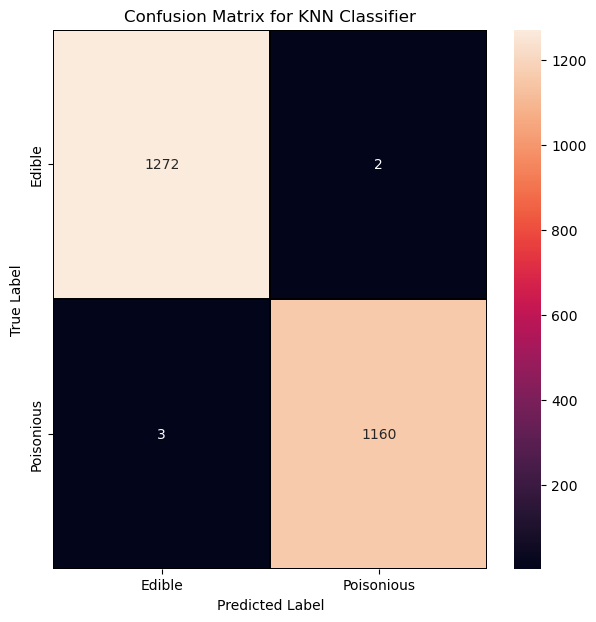

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
#dataset import
colnames =['e/p','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=colnames, header=0)

#dataset processing to convert categorical data into numerical data
df = df.astype('category')
labelencoder = LabelEncoder()
for column in df.columns:
  df[column] = labelencoder.fit_transform(df[column])
# print(df.head())

#to predict the edibility of the mushroom, we drop the premier column
X = df.drop(['e/p'], axis=1)
y = df["e/p"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#implementation of KNN classifier
best_KValue = 0
bsf = 0

for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  if knn.score(X_test, y_test) > bsf:
    bsf = knn.score(X_train, y_train)
    best_KValue = i

print("Best KNN Value: {}".format(best_KValue))
print("Test Accuracy: {}%".format(round(bsf*100, 2)))

y_pred = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

x_axis = ["Edible", "Poisonious"]
y_axis = ["Edible", "Poisonious"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis, yticklabels=y_axis, shuffle = false)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()